Train: (850, 23) Test: (170, 23)

===== 10 DATA QUERIES =====
➡️ Average typing speed:
38.80677412995666

➡️ User with max typing speed:
Maaz Khan

➡️ User with highest backspace ratio:
Hasnain

➡️ Average correction latency:
527.5181180293896

➡️ Std Dev of hold time:
21.513929125513293

➡️ Min tempo change rate:
0.469

➡️ Max entropy IKD:
0.995

➡️ Median hold time:
100.3883084169471

➡️ Top 5 fastest typers:
             name  typingSpeedWPM
364     Maaz Khan      110.179412
391     Maaz Khan      110.000000
355     Maaz Khan      109.031926
91   Ammar Wolfie      104.000000
381     Maaz Khan      104.000000

➡️ Top 5 slowest typers:
                    name  typingSpeedWPM
509  Muhammad Ayan Azhar        2.608843
549  Muhammad Ayan Azhar        3.000000
514  Muhammad Ayan Azhar        4.488786
581            Qasim Ali        6.000000
521  Muhammad Ayan Azhar        6.148124



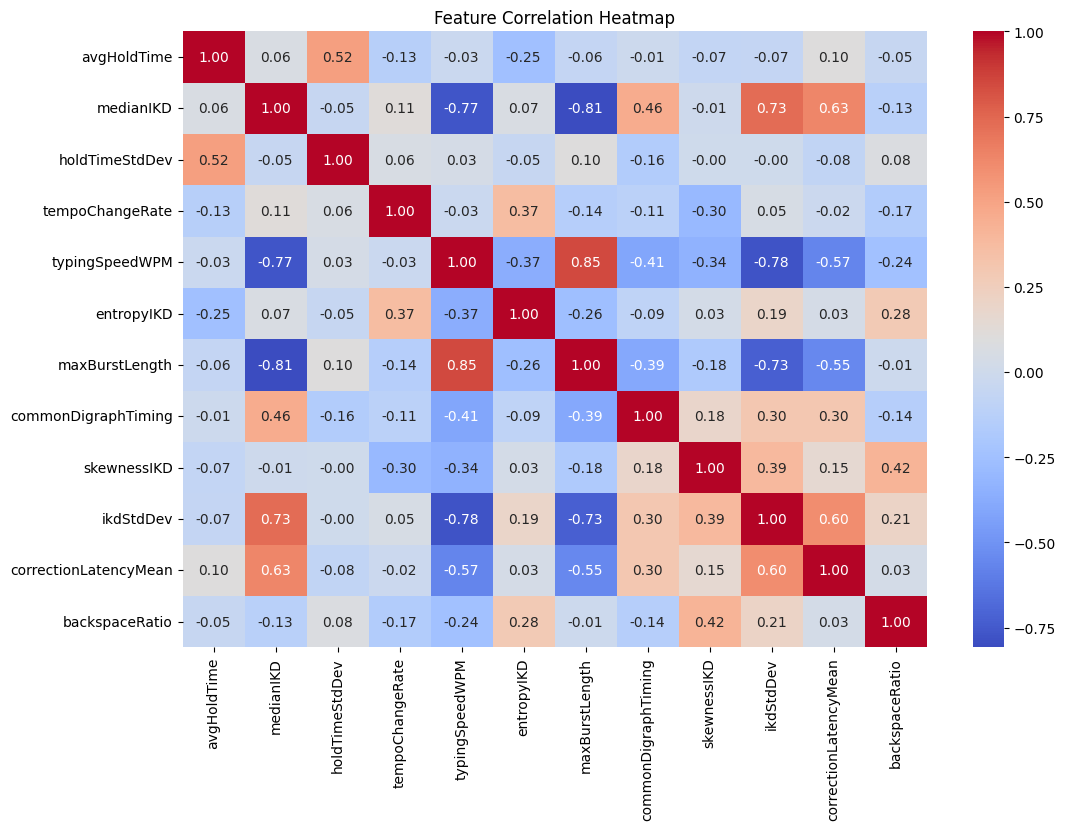


1. FEATURE CORRELATION MATRIX ANALYSIS


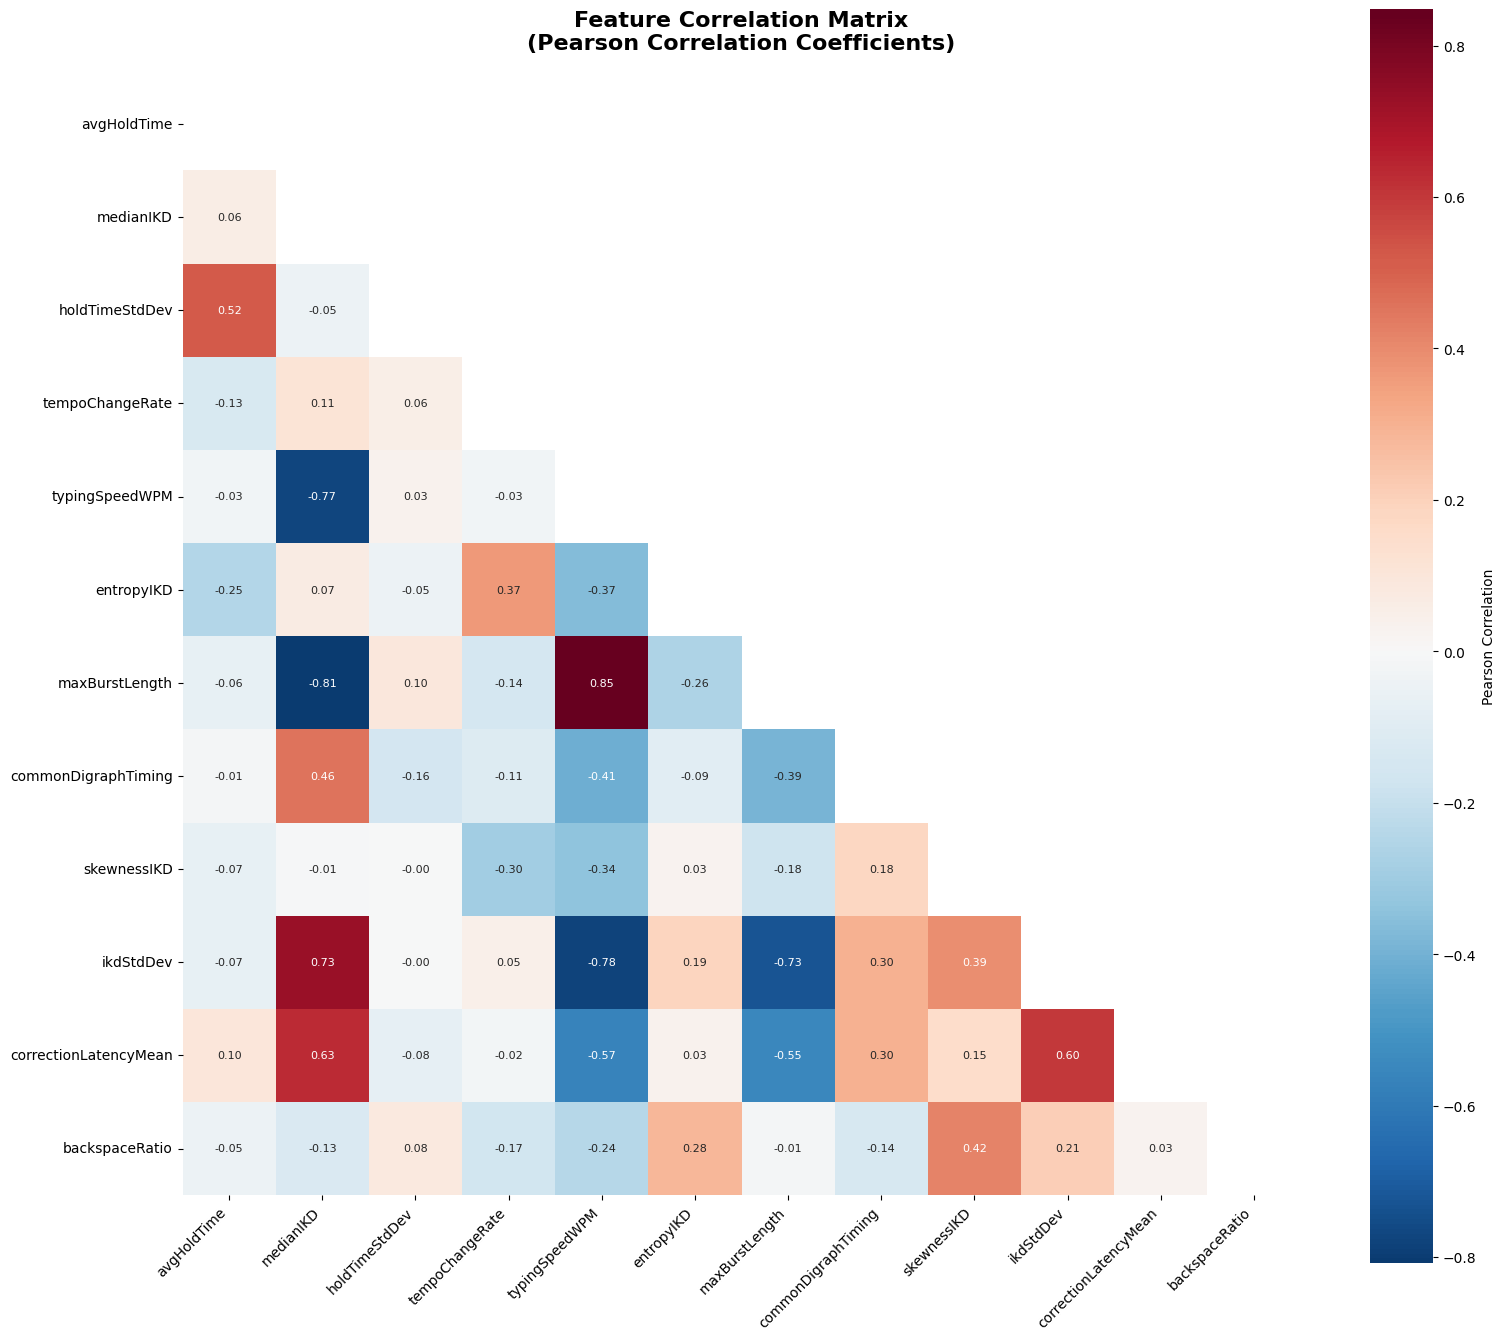


===== Training KNN Classifier =====
Accuracy = 0.7118
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.00      0.00      0.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.50      0.10      0.17        10
           6       1.00      0.90      0.95        10
           7       0.50      1.00      0.67        10
           8       1.00      1.00      1.00        10
           9       0.33      0.10      0.15        10
          10       1.00      0.90      0.95        10
          11       0.28      0.70      0.40        10
          12       0.00      0.00      0.00        10
          13       0.56      0.50      0.53        10
          14       0.50      1.00      0.67        10
          15       1.00      0.90      0.95        10
          16       0.91   

/tmp/ipython-input-2029500926.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")


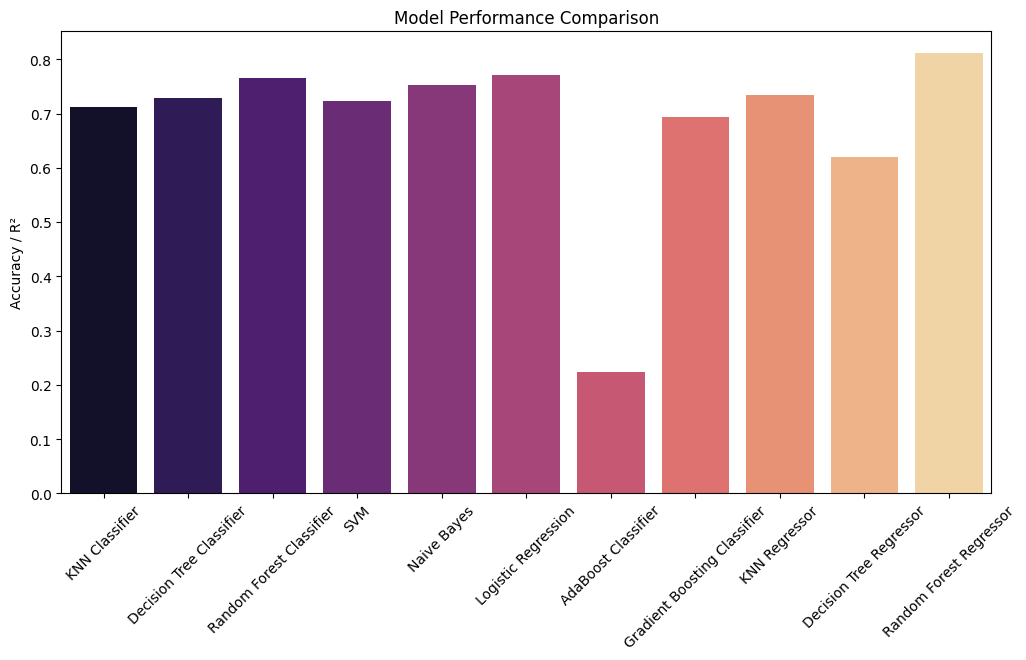


===== K-FOLD CROSS VALIDATION =====
KNN Classifier → Mean CV Accuracy = 0.9082
Decision Tree Classifier → Mean CV Accuracy = 0.8694
Random Forest Classifier → Mean CV Accuracy = 0.9482
SVM → Mean CV Accuracy = 0.9341
Naive Bayes → Mean CV Accuracy = 0.9576
Logistic Regression → Mean CV Accuracy = 0.9294
AdaBoost Classifier → Mean CV Accuracy = 0.2612
Gradient Boosting Classifier → Mean CV Accuracy = 0.9106
KNN Regressor → Mean CV Accuracy = 0.8627
Decision Tree Regressor → Mean CV Accuracy = 0.7224
Random Forest Regressor → Mean CV Accuracy = 0.8719


/tmp/ipython-input-2029500926.py:184: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(kfold_scores.keys()), y=list(kfold_scores.values()), palette="coolwarm")


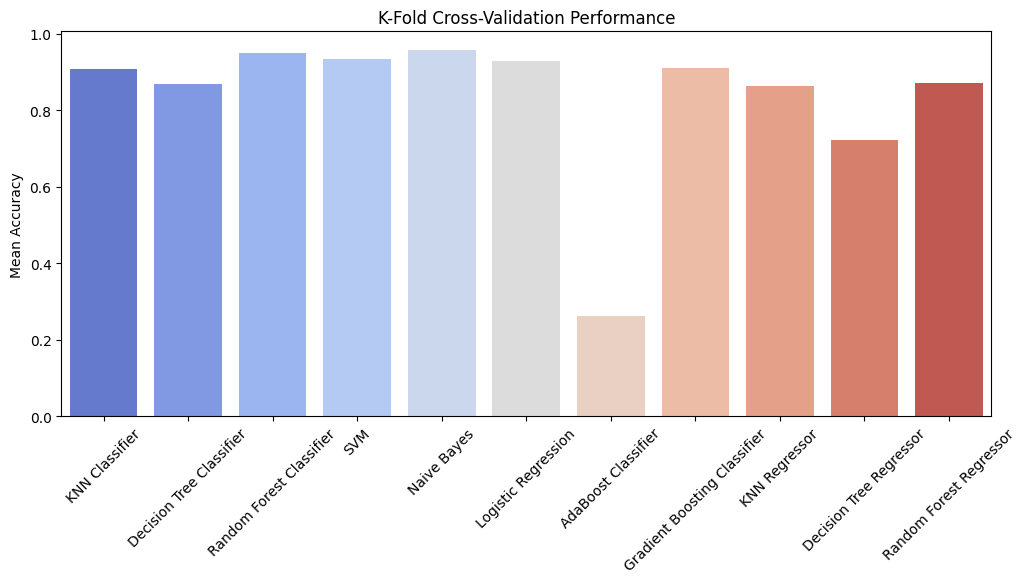


🎉 BEST MODEL (TEST SET): Random Forest Regressor
BEST MODEL (K-FOLD): Naive Bayes


In [4]:
# ======================================================
# 📘 Keystroke Dynamics ML Pipeline (Train + Test)
# ======================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, \
    AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # Or other available fonts
# =========================================
# STEP 1: Load dataset
# =========================================
train_df = pd.read_excel("Train.xlsx")
test_df = pd.read_excel("Test.xlsx")
print("Train:", train_df.shape, "Test:", test_df.shape)

# =========================================
# STEP 2: Features + Target
# =========================================
features = [
    "avgHoldTime","medianIKD","holdTimeStdDev","tempoChangeRate",
    "typingSpeedWPM","entropyIKD","maxBurstLength","commonDigraphTiming",
    "skewnessIKD","ikdStdDev","correctionLatencyMean","backspaceRatio"
]
target = "name"

X_train = train_df[features]
y_train = train_df[target]
X_test_final = test_df[features]
y_test_final = test_df[target]

# =========================================
# STEP 3: Encode labels
# =========================================
encoder = LabelEncoder()
encoder.fit(pd.concat([y_train, y_test_final]))

y_train_enc = encoder.transform(y_train).ravel()
y_test_final_enc = encoder.transform(y_test_final).ravel()

# =========================================
# STEP 4: Scaling
# =========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_final_scaled = scaler.transform(X_test_final)

# =========================================
# STEP 5: 10 DATA QUERIES
# =========================================
print("\n===== 10 DATA QUERIES =====")
queries = [
    ("Average typing speed", X_train["typingSpeedWPM"].mean()),
    ("User with max typing speed", train_df.loc[X_train["typingSpeedWPM"].idxmax(), "name"]),
    ("User with highest backspace ratio", train_df.loc[X_train["backspaceRatio"].idxmax(), "name"]),
    ("Average correction latency", X_train["correctionLatencyMean"].mean()),
    ("Std Dev of hold time", X_train["holdTimeStdDev"].std()),
    ("Min tempo change rate", X_train["tempoChangeRate"].min()),
    ("Max entropy IKD", X_train["entropyIKD"].max()),
    ("Median hold time", X_train["avgHoldTime"].median()),
    ("Top 5 fastest typers", train_df.nlargest(5, "typingSpeedWPM")[["name", "typingSpeedWPM"]]),
    ("Top 5 slowest typers", train_df.nsmallest(5, "typingSpeedWPM")[["name", "typingSpeedWPM"]])
]
for q, res in queries:
    print(f"➡️ {q}:\n{res}\n")

# =========================================
# STEP 6: Correlation Heatmap
# =========================================
plt.figure(figsize=(12, 8))
# Feature correlation
corr_features = train_df[features].corr()
sns.heatmap(corr_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("feature_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

available_features = [col for col in features if col in train_df.columns]
# 1. BASIC CORRELATION MATRIX
print("\n" + "=" * 60)
print("1. FEATURE CORRELATION MATRIX ANALYSIS")
print("=" * 60)

# Compute correlation matrix
correlation_matrix = train_df[available_features].corr()

# Create correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='RdBu_r',
    center=0,
    square=True,
    annot=True,
    fmt='.2f',
    cbar_kws={'label': 'Pearson Correlation'},
    annot_kws={'size': 8}
)
plt.title('Feature Correlation Matrix\n(Pearson Correlation Coefficients)',
          fontsize=16, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('feature_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


# =========================================
# STEP 7: Define Models
# =========================================
models = {
    "KNN Classifier": ("clf", KNeighborsClassifier()),
    "Decision Tree Classifier": ("clf", DecisionTreeClassifier()),
    "Random Forest Classifier": ("clf", RandomForestClassifier()),
    "SVM": ("clf", SVC()),
    "Naive Bayes": ("clf", GaussianNB()),
    "Logistic Regression": ("clf", LogisticRegression(max_iter=1000)),
    "AdaBoost Classifier": ("clf", AdaBoostClassifier()),
    "Gradient Boosting Classifier": ("clf", GradientBoostingClassifier()),
    "KNN Regressor": ("reg", KNeighborsRegressor()),
    "Decision Tree Regressor": ("reg", DecisionTreeRegressor()),
    "Random Forest Regressor": ("reg", RandomForestRegressor())
}

results = {}

# =========================================
# STEP 8: Train + Test Models
# =========================================
for name, (model_type, model) in models.items():
    print(f"\n===== Training {name} =====")
    model.fit(X_train_scaled, y_train_enc)
    y_pred = model.predict(X_test_final_scaled)

    if model_type == "clf":
        acc = accuracy_score(y_test_final_enc, y_pred)
        print(f"Accuracy = {acc:.4f}")
        print(classification_report(y_test_final_enc, y_pred, zero_division=0))
        results[name] = acc
    else:
        mse = mean_squared_error(y_test_final_enc, y_pred)
        r2 = r2_score(y_test_final_enc, y_pred)
        print(f"MSE = {mse:.4f} | R² = {r2:.4f}")
        results[name] = r2

# =========================================
# STEP 9: Comparison Graph Between Models
# =========================================
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")
plt.xticks(rotation=45)
plt.ylabel("Accuracy / R²")
plt.title("Model Performance Comparison")
plt.savefig("model_performance_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# =========================================
# STEP 10: K-Fold Cross Validation
# =========================================
print("\n===== K-FOLD CROSS VALIDATION =====")
kfold_scores = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, (model_type, model) in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train_enc, cv=kf)
    kfold_scores[name] = cv_scores.mean()
    print(f"{name} → Mean CV Accuracy = {cv_scores.mean():.4f}")

plt.figure(figsize=(12, 5))
sns.barplot(x=list(kfold_scores.keys()), y=list(kfold_scores.values()), palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Mean Accuracy")
plt.title("K-Fold Cross-Validation Performance")
plt.savefig("kfold_crossval_performance.png", dpi=300, bbox_inches='tight')
plt.show()

# =========================================
# STEP 12: Print Best Model
# =========================================
best_model = max(results, key=results.get)
best_kfold = max(kfold_scores, key=kfold_scores.get)
print("\n🎉 BEST MODEL (TEST SET):", best_model)
print("BEST MODEL (K-FOLD):", best_kfold)